In [16]:
import pandas as pd
df = pd.read_csv("D:/Hackathon/Data/raw/Superstore.csv", encoding="ISO-8859-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [19]:
df.shape

(9994, 21)

In [ ]:
def clean_data(df):
    print("Cleaning data...")
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True)
    df["Profit Margin"] = (df["Profit"] / df["Sales"]) * 100
    return df

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
def train_model(df):
    print("Training model...")
    X = df[["Discount", "Quantity", "Sales"]]
    y = df["Profit"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    metrics = {
        "R²": r2_score(y_test, preds),
        "MAE": mean_absolute_error(y_test, preds)
    }
    return model, metrics

In [24]:
train_model(df)

Training model...


(LinearRegression(), {'R²': -0.7240890405096152, 'MAE': 69.77214730362971})

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def generate_visuals(df):
    print("Generating visualizations...")

    sns.barplot(x='Region', y='Profit', data=df)
    plt.title("Profit by Region")
    plt.savefig("4_Results/visualizations/profit_by_region.png")
    plt.close()

    sns.lineplot(x='Discount', y='Profit', data=df)
    plt.title("Discount vs Profit")
    plt.savefig("4_Results/visualizations/discount_vs_profit.png")
    plt.close()

Generating visualizations...


FileNotFoundError: [Errno 2] No such file or directory: '4_Results/visualizations/profit_by_region.png'

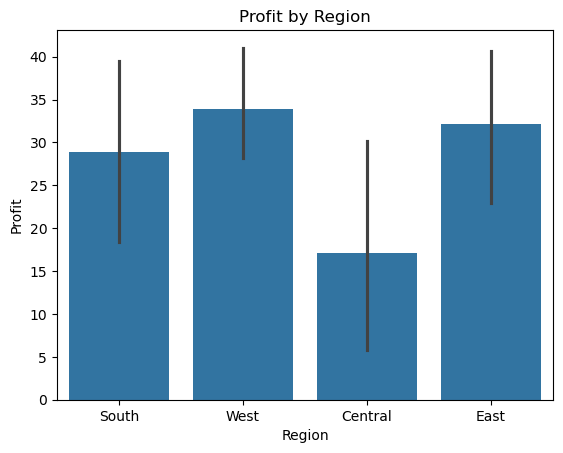

In [26]:
generate_visuals(df)